In [1]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 10.2 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/tiagogodoi/infra-ensino.git

Cloning into 'infra-ensino'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 30 (delta 11), reused 15 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (30/30), 1.57 MiB | 7.39 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from unidecode import unidecode
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter

def readcsv(name):
  return pd.read_csv('/content/infra-ensino/'+name, delimiter=';', decimal=",", encoding='latin-1')

url = 'Proficiencia_SARESP_2021_por_escola.csv'
df_prof = readcsv(url)
df_prof.describe()

,DEPADM,DepBol,codRMet,CODESC,cod_per,co_comp,medprof
count,25977.0,25977.0,25977.000000,25977.000000,25977.0,25977.000000,25974.000000
mean,1.0,1.0,3.115833,281105.579859,9.0,3.333333,249.337345
std,0.0,0.0,2.023370,392330.816624,0.0,2.624720,26.680315
min,1.0,1.0,1.000000,12.000000,9.0,1.000000,138.200000
25%,1.0,1.0,1.000000,16780.000000,9.0,1.000000,234.300000
50%,1.0,1.0,3.000000,36274.000000,9.0,2.000000,252.700000
75%,1.0,1.0,5.000000,901507.000000,9.0,7.000000,267.500000
max,1.0,1.0,7.000000,926103.000000,9.0,7.000000,373.200000


In [4]:
df_prof_em = df_prof[df_prof["SERIE_ANO"]=="EM-3ª série"]
df_prof_em = df_prof_em[["medprof","CODESC"]].groupby(["CODESC"]).sum()
df_prof_em

,medprof
CODESC,
24,754.5
36,734.1
48,766.2
59,773.8
97,734.6
...,...
926024,856.9
926036,779.5
926048,742.8


{'whiskers': [<matplotlib.lines.Line2D at 0x7a6655c11290>,
 'caps': [<matplotlib.lines.Line2D at 0x7a6655a72b50>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7a66549bd650>],
 'medians': [<matplotlib.lines.Line2D at 0x7a6655a73f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a6655a9c990>],
 'means': []}

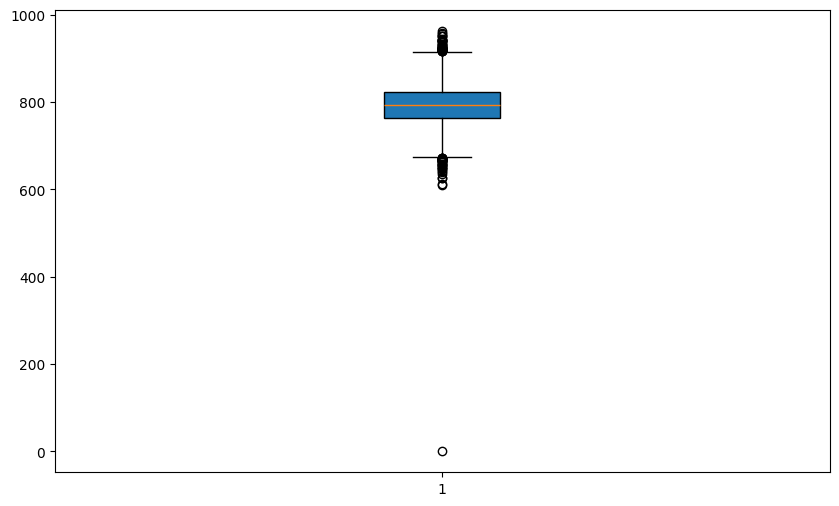

In [ ]:
# Criar o boxplot
plt.figure(figsize=(10, 6))  # Tamanho da figura
plt.boxplot(df_prof_em, vert=True, patch_artist=True)

<Axes: ylabel='Density'>

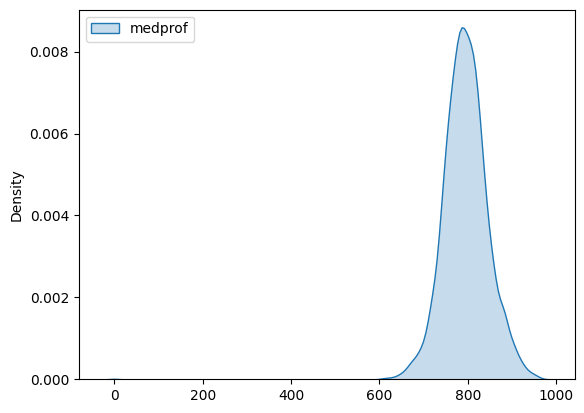

In [5]:
import seaborn as sns
sns.kdeplot(df_prof_em, fill=True)

In [6]:
df_inse = readcsv('INSE_2019_ESCOLAS.csv')
df_inse = df_inse[["NOMESC","NIVEL SOCIOECONOMICO DOS ALUNOS","MUN","COD_ESC"]]
df_inse

,NOMESC,NIVEL SOCIOECONOMICO DOS ALUNOS,MUN,COD_ESC
0,HELEN KELLER,5.31,ADAMANTINA,30806
1,DURVALINO GRION PROF,5.36,ADAMANTINA,31045
2,EUDECIO LUIZ VICENTE PROF ETEC,5.78,ADAMANTINA,31082
3,HERVAL BELLUSCI ENGENHEIRO ETEC,5.39,ADAMANTINA,31100
4,FLEURIDES CAVALLINI MENECHINO PROFA,5.54,ADAMANTINA,31112
...,...,...,...,...
10197,ESCOLA MUNICIPAL DE EDUCACAO BASICA CARLOS NAT...,5.39,ESTIVA GERBI,6278
10198,AGENOR DE CARVALHO CAPITAO,5.31,ESTIVA GERBI,20382
10199,ADELIA CALEFFI GERBI EMEF,5.34,ESTIVA GERBI,222318
10200,EVALDO JOSE ZENARI EMEF,5.58,ESTIVA GERBI,277241


{'whiskers': [<matplotlib.lines.Line2D at 0x7da646735bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7da641ad1ad0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7da646981dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7da641ad2f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7da641ad3810>],
 'means': []}

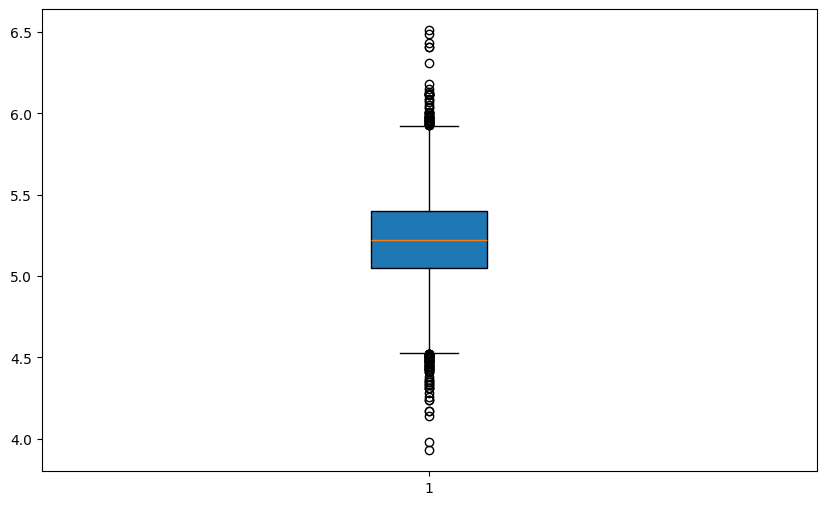

In [7]:
# Criar o boxplot
plt.figure(figsize=(10, 6))  # Tamanho da figura
plt.boxplot(df_inse["NIVEL SOCIOECONOMICO DOS ALUNOS"], vert=True, patch_artist=True)

<Axes: xlabel='NIVEL SOCIOECONOMICO DOS ALUNOS', ylabel='Density'>

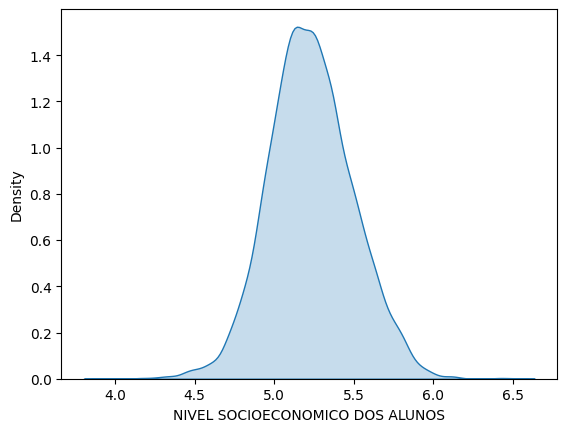

In [ ]:
sns.kdeplot(df_inse["NIVEL SOCIOECONOMICO DOS ALUNOS"], fill=True)

In [8]:
df_idesp = readcsv('IDESP_ESCOLA_2021.csv')
df_idesp.rename(columns={'ENSINO_MÃDIO': 'ENSINO_MÉDIO'}, inplace=True)
df_idesp_em = df_idesp[["NomeEscola","NomeMunicipio","ENSINO_MÉDIO"]].dropna()
df_idesp_em.describe()

,ENSINO_MÉDIO
count,3613.000000
mean,2.055945
std,0.676132
min,0.000000
25%,1.610000
50%,2.000000
75%,2.450000
max,4.680000


{'whiskers': [<matplotlib.lines.Line2D at 0x7a6654d7da90>,
 'caps': [<matplotlib.lines.Line2D at 0x7a6654cfc390>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7a665500d690>],
 'medians': [<matplotlib.lines.Line2D at 0x7a6654cd73d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a6654d721d0>],
 'means': []}

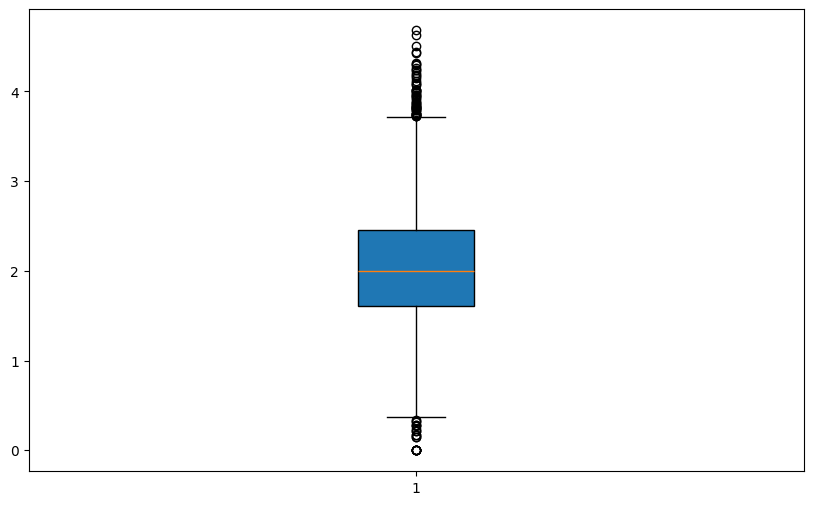

In [ ]:
plt.figure(figsize=(10, 6))  # Tamanho da figura
plt.boxplot(df_idesp_em["ENSINO_MÉDIO"], vert=True, patch_artist=True)

<Axes: xlabel='ENSINO_MÉ\x89DIO', ylabel='Density'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


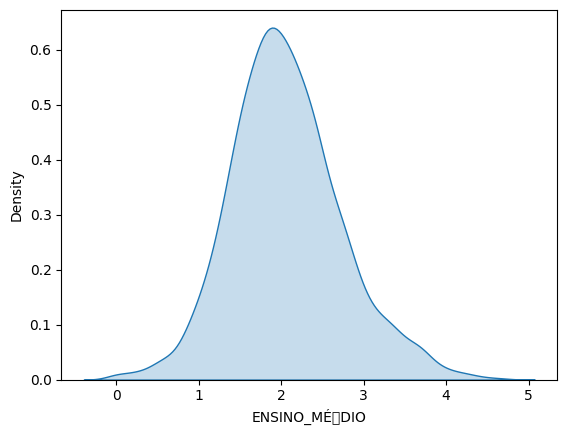

In [ ]:
sns.kdeplot(df_idesp_em["ENSINO_MÉDIO"], fill=True)

In [9]:
df_leitos_sus = readcsv('saude_leitos_mun_ano.csv')
df_leitos_sus = df_leitos_sus[(df_leitos_sus.ano == 2019)]
df_leitos_sus = df_leitos_sus[["cod_ibge","leitos_sus"]]
df_leitos_sus.describe()

,cod_ibge,leitos_sus
count,6.450000e+02,646.000000
mean,3.528698e+06,162.356037
std,1.670033e+04,2142.685273
min,3.500105e+06,0.000000
25%,3.514601e+06,0.000000
50%,3.528700e+06,11.000000
75%,3.543204e+06,47.750000
max,3.557303e+06,52441.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7a6649888750>,
 'caps': [<matplotlib.lines.Line2D at 0x7a664988bed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a664938dd90>],
 'medians': [<matplotlib.lines.Line2D at 0x7a664988a190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a664988a3d0>],
 'means': []}

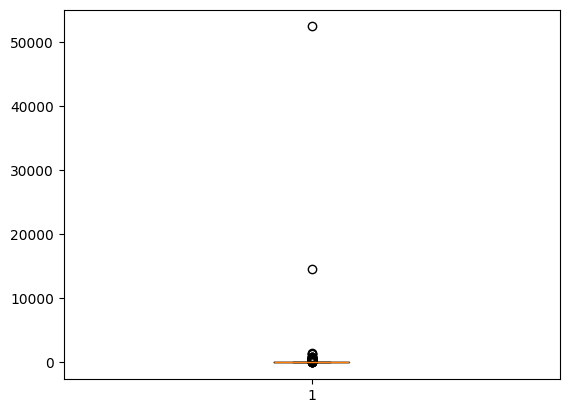

In [ ]:
plt.boxplot(df_leitos_sus['leitos_sus'])

In [10]:
df_pib = readcsv('econ_pib.csv')
df_pib

,cod_Ibge,localidade,setor,ano,valor
0,3500105,Adamantina,Serviços,2020,R$ 945.063.109
1,3500204,Adolfo,Serviços,2020,R$ 64.106.365
2,3500303,Aguaí,Serviços,2020,R$ 545.287.410
3,3500402,Águas da Prata,Serviços,2020,R$ 128.294.299
4,3500501,Águas de Lindóia,Serviços,2020,R$ 427.337.387
...,...,...,...,...,...
5800,3556909,Vista Alegre do Alto,PIB per capita,2020,"50437,02"
5801,3556958,Vitória Brasil,PIB per capita,2020,"24171,39"
5802,3557006,Votorantim,PIB per capita,2020,"28586,67"
5803,3557105,Votuporanga,PIB per capita,2020,"36770,23"


In [13]:
df_pib_min = df_pib[["cod_Ibge","setor","valor"]]
# df_pib_min = df_pib.pivot(columns='setor', values='valor').pivot(index='cod_Ibge', columns='setor', values='valor').reset_index()
# df_pib_min.describe()

In [14]:
# prompt: quero pibotar o dataframe df_pib de forma que as colunas sejam apenas cod_Ibge, e os valores da coluna setor. o valor de cada célula é o valor da coluna valor. tudo isso sem criar um multiindex. Além disso, alguns dos valores são valores em dinheiro, porém são string. Quero alterá-los para double. Esses valores começam com R$.

df_pib_min = df_pib.copy()

# Função para converter strings de valores monetários para float
def convert_to_float(value):
  if isinstance(value, str):
    try:
      return np.double(value.replace('R$', '').replace('.', '').replace(',', '.'))
    except ValueError:
      return None  # Ou outro valor padrão caso a conversão falhe
  return value

# Aplicar a função para converter valores na coluna 'valor'
df_pib_min['valor'] = df_pib_min['valor'].apply(convert_to_float)


# Pivoteamento sem multiindex
df_pib_pivoted = df_pib_min.pivot(index='cod_Ibge', columns='setor', values='valor').reset_index()

df_pib_pivoted.describe()


setor,cod_Ibge,Agropecuária,Impostos líquidos de subsídios,Indústria,PIB,PIB per capita,Serviços,Serviços (exceto administração pública),Serviços de administração pública,Valor adicionado
count,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,645.000000,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02
mean,3.528698e+06,6.882357e+07,5.624631e+08,6.463147e+08,3.686262e+09,39533.942822,2.408661e+09,2.102809e+09,3.058514e+08,3.123799e+09
std,1.670033e+04,1.045277e+08,5.052622e+09,2.760648e+09,3.026368e+10,36231.236960,2.272812e+10,2.087290e+10,1.870074e+09,2.522096e+10
min,3.500105e+06,0.000000e+00,7.035730e+05,1.182799e+06,3.393107e+07,9875.700000,2.424653e+07,9.223754e+06,1.151338e+07,3.285588e+07
25%,3.514601e+06,1.976634e+07,7.157663e+06,1.017149e+07,1.440600e+08,22539.700000,8.468864e+07,5.165729e+07,3.016082e+07,1.362296e+08
50%,3.528700e+06,4.006892e+07,2.896004e+07,6.083742e+07,3.966707e+08,30415.130000,2.260596e+08,1.646035e+08,6.619643e+07,3.609388e+08
75%,3.543204e+06,8.030708e+07,1.544232e+08,3.475976e+08,1.564823e+09,43418.230000,9.034191e+08,7.206929e+08,1.901787e+08,1.386250e+09
max,3.557303e+06,1.670514e+09,1.243491e+11,5.807778e+10,7.487590e+11,369866.410000,5.662702e+11,5.203580e+11,4.591221e+10,6.244099e+11


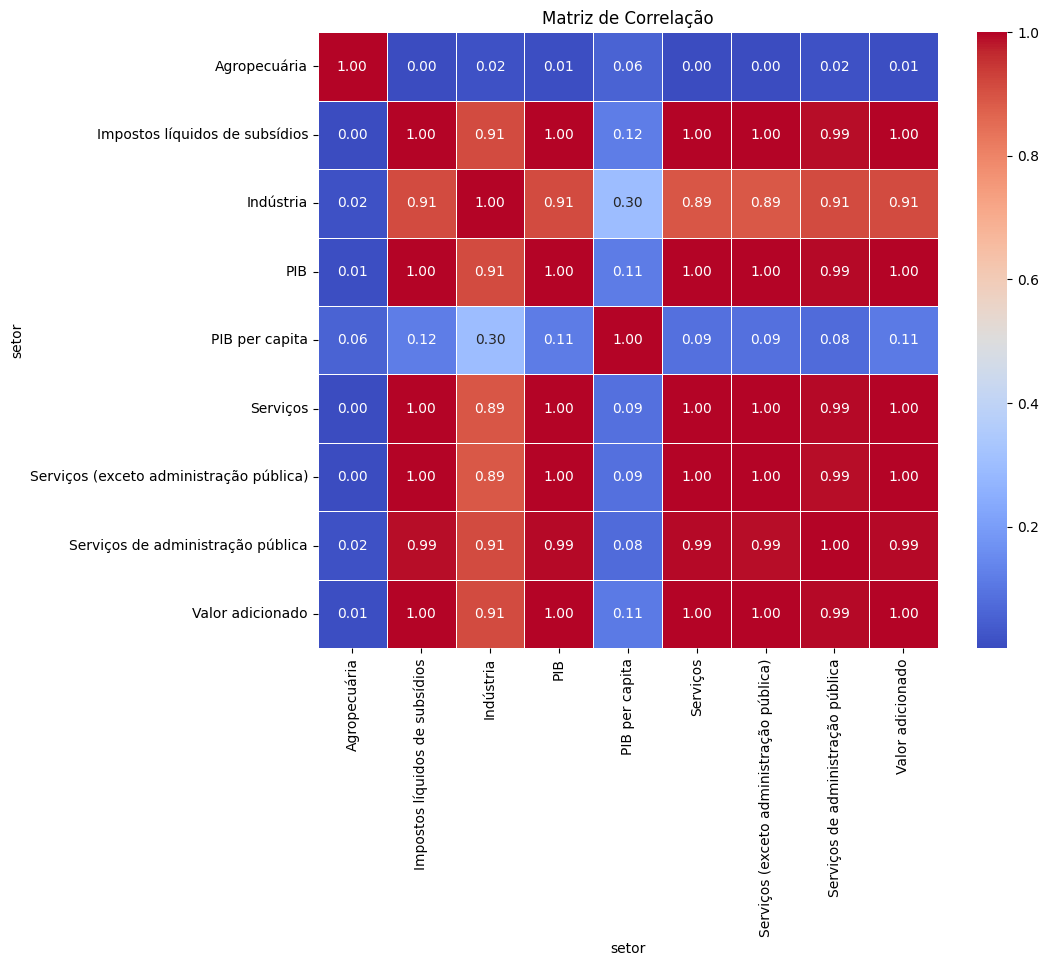

In [ ]:
df_pib_pivoted = df_pib_pivoted.drop('cod_Ibge', axis = 1)
matriz_corr = df_pib_pivoted.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

In [15]:
df_comex = readcsv('econ_comex.csv')
df_comex = df_comex[["Cod_IBGE","Valor das Exportações (US$ FOB)","Valor das Importações (US$ FOB)"]]
df_comex.describe()

,Cod_IBGE,Valor das Exportações (US$ FOB),Valor das Importações (US$ FOB)
count,6.450000e+02,6.460000e+02,6.460000e+02
mean,3.528698e+06,1.601262e+08,1.838464e+08
std,1.670033e+04,2.060640e+09,2.387449e+09
min,3.500105e+06,0.000000e+00,0.000000e+00
25%,3.514601e+06,0.000000e+00,0.000000e+00
50%,3.528700e+06,3.345910e+05,5.025750e+04
75%,3.543204e+06,3.552684e+07,7.219516e+06
max,3.557303e+06,5.172078e+10,5.938238e+10


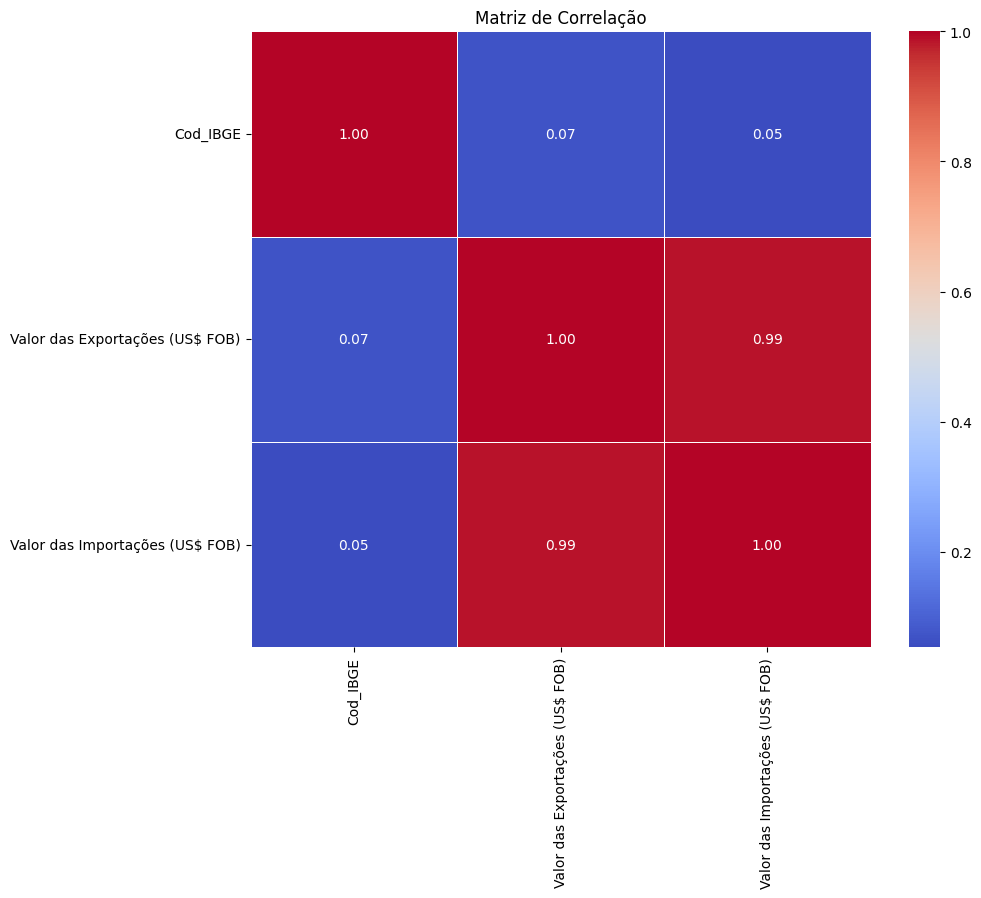

In [ ]:
matriz_corr = df_comex.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

In [16]:
df_med = readcsv('saude_med_enf_mun_ultano.csv')
df_med = df_med[["cod_ibge","prof_sus","prof_nsus","prof_tot","medenf","prof_habitante"]].pivot_table(index='cod_ibge',columns='medenf', values=['prof_sus','prof_nsus','prof_tot','prof_habitante'])
df_med.columns = df_med.columns.map('{0[0]}_{0[1]}'.format)
df_med.describe()

,prof_habitante_Enfermeiro,prof_habitante_Médico,prof_nsus_Enfermeiro,prof_nsus_Médico,prof_sus_Enfermeiro,prof_sus_Médico,prof_tot_Enfermeiro,prof_tot_Médico
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1.029891,1.505512,29.136434,74.469767,82.224806,137.466667,111.361240,211.936434
std,0.638508,1.444622,383.254477,819.517955,664.364330,1132.908668,1046.129367,1949.585413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.620000,0.600000,0.000000,0.000000,5.000000,4.000000,5.000000,4.000000
50%,0.880000,1.050000,0.000000,1.000000,11.000000,12.000000,11.000000,14.000000
75%,1.310000,1.940000,2.000000,9.000000,32.000000,49.000000,34.000000,59.000000
max,5.730000,11.290000,9611.000000,20248.000000,16452.000000,27871.000000,26063.000000,48119.000000


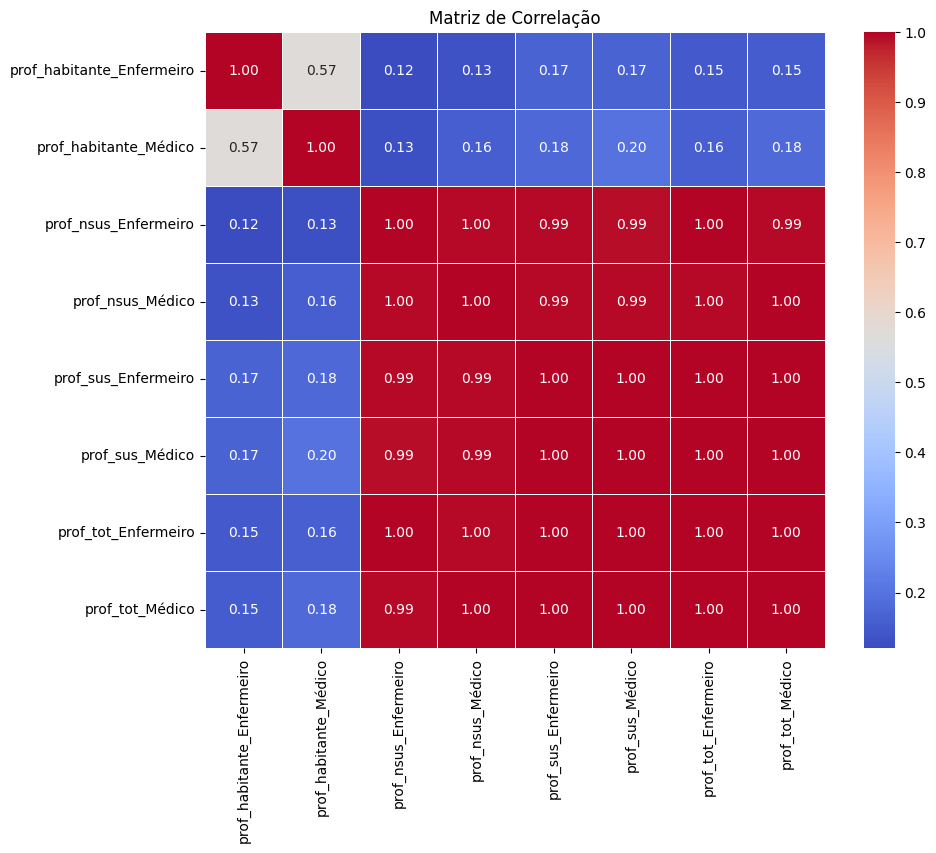

In [ ]:
matriz_corr = df_med.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

In [17]:
df_pop = readcsv('populacao_municipal.csv')
df_pop = df_pop[(df_pop.ano == 2021)]
df_pop = df_pop[["cod_ibge","municipio","populacao"]]
df_pop.describe()

,cod_ibge,populacao
count,6.450000e+02,6.450000e+02
mean,3.528698e+06,6.960141e+04
std,1.670033e+04,4.820846e+05
min,3.500105e+06,8.110000e+02
25%,3.514601e+06,5.561000e+03
50%,3.528700e+06,1.350300e+04
75%,3.543204e+06,4.140500e+04
max,3.557303e+06,1.191485e+07


In [20]:
df_completo = pd.merge(df_pop,df_leitos_sus, on="cod_ibge", how="left")
df_completo = pd.merge(df_completo,df_pib_pivoted,left_on="cod_ibge",right_on="cod_Ibge", how="left")
df_completo = pd.merge(df_completo,df_med,on="cod_ibge", how="left")
df_completo = pd.merge(df_completo,df_comex, right_on="Cod_IBGE",left_on="cod_ibge", how="left")
df_completo

,cod_ibge,municipio,populacao,leitos_sus,cod_Ibge,Agropecuária,Impostos líquidos de subsídios,Indústria,PIB,PIB per capita,...,prof_habitante_Médico,prof_nsus_Enfermeiro,prof_nsus_Médico,prof_sus_Enfermeiro,prof_sus_Médico,prof_tot_Enfermeiro,prof_tot_Médico,Cod_IBGE,Valor das Exportações (US$ FOB),Valor das Importações (US$ FOB)
0,3500105,Adamantina,33869,206,3500105,40457977.0,93441292.0,177599227.0,1.256562e+09,37073.28,...,4.460,3.0,21.0,76.0,130.0,79.0,151.0,3500105.0,20915821,697487
1,3500204,Adolfo,3436,0,3500204,48342164.0,3815840.0,20436994.0,1.367014e+08,39658.07,...,10.800,0.0,0.0,5.0,37.0,5.0,37.0,3500204.0,0,0
2,3500303,Aguaí,35885,0,3500303,111006271.0,169564576.0,326585055.0,1.152443e+09,32364.73,...,1.990,0.0,23.0,21.0,49.0,21.0,72.0,3500303.0,137409,32478066
3,3500402,Águas da Prata,7807,0,3500402,21848090.0,11462150.0,25163562.0,1.867681e+08,23953.84,...,3.580,1.0,3.0,6.0,25.0,7.0,28.0,3500402.0,0,23864
4,3500501,Águas de Lindóia,18438,30,3500501,7179034.0,30834851.0,31525643.0,4.968769e+08,27042.39,...,2.810,1.0,10.0,16.0,42.0,17.0,52.0,3500501.0,0,583748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,3556909,Vista Alegre do Alto,8091,0,3556909,39167901.0,51665086.0,130091058.0,4.042023e+08,50437.02,...,0.610,0.0,0.0,8.0,5.0,8.0,5.0,3556909.0,52195826,4940
641,3556958,Vitória Brasil,1761,0,3556958,7301801.0,2239741.0,1898494.0,4.254164e+07,24171.39,...,0.000,0.0,0.0,2.0,0.0,2.0,0.0,3556958.0,0,0
642,3557006,Votorantim,120662,53,3557006,2005246.0,408956374.0,791492150.0,3.425370e+09,28586.67,...,0.560,22.0,32.0,65.0,36.0,87.0,68.0,3557006.0,16870790,29960178
643,3557105,Votuporanga,92193,115,3557105,53897482.0,308615908.0,570908718.0,3.374037e+09,36770.23,...,3.580,29.0,74.0,216.0,258.0,245.0,332.0,3557105.0,9612819,2832675


In [23]:
df_completo["municipio"] = df_completo["municipio"].map(unidecode)
df_completo["municipio"] = df_completo["municipio"].str.upper()
df_completo.head()

,cod_ibge,municipio,populacao,leitos_sus,cod_Ibge,Agropecuária,Impostos líquidos de subsídios,Indústria,PIB,PIB per capita,...,prof_habitante_Médico,prof_nsus_Enfermeiro,prof_nsus_Médico,prof_sus_Enfermeiro,prof_sus_Médico,prof_tot_Enfermeiro,prof_tot_Médico,Cod_IBGE,Valor das Exportações (US$ FOB),Valor das Importações (US$ FOB)
0,3500105,ADAMANTINA,33869,206,3500105,40457977.0,93441292.0,177599227.0,1.256562e+09,37073.28,...,4.46,3.0,21.0,76.0,130.0,79.0,151.0,3500105.0,20915821,697487
1,3500204,ADOLFO,3436,0,3500204,48342164.0,3815840.0,20436994.0,1.367014e+08,39658.07,...,10.80,0.0,0.0,5.0,37.0,5.0,37.0,3500204.0,0,0
2,3500303,AGUAI,35885,0,3500303,111006271.0,169564576.0,326585055.0,1.152443e+09,32364.73,...,1.99,0.0,23.0,21.0,49.0,21.0,72.0,3500303.0,137409,32478066
3,3500402,AGUAS DA PRATA,7807,0,3500402,21848090.0,11462150.0,25163562.0,1.867681e+08,23953.84,...,3.58,1.0,3.0,6.0,25.0,7.0,28.0,3500402.0,0,23864
4,3500501,AGUAS DE LINDOIA,18438,30,3500501,7179034.0,30834851.0,31525643.0,4.968769e+08,27042.39,...,2.81,1.0,10.0,16.0,42.0,17.0,52.0,3500501.0,0,583748


In [65]:
# agrupar com KMeans(3) os dados das cidades
df_comp_pre_knn = df_completo.drop("cod_ibge", axis=1)
df_comp_pre_knn = df_comp_pre_knn.drop("cod_Ibge", axis=1)

kmeans = KMeans(n_clusters = 5, init = 'k-means++')
df_knn = df_comp_pre_knn.drop("Cod_IBGE", axis=1).drop("municipio", axis=1)
kmeans.fit(df_knn)
df_comp_pre_knn['Grupo'] = kmeans.fit_predict(df_knn)

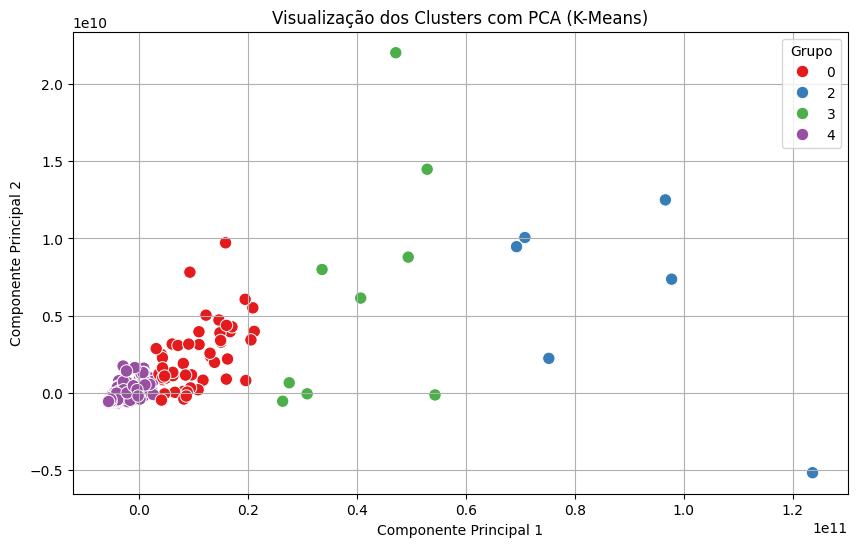

In [66]:
from sklearn.decomposition import PCA

# Aplicar PCA para reduzir os dados para 2 dimensões
pca = PCA(n_components=2)
componentes_principais = pca.fit_transform(df_knn)

# Adiciona os componentes principais ao DataFrame
df = df_comp_pre_knn
df['PCA1'] = componentes_principais[:, 0]
df['PCA2'] = componentes_principais[:, 1]

# Visualizar os clusters com seaborn/matplotlib
plt.figure(figsize=(10, 6))
# Drop no registro de SP
sns.scatterplot(data=df.drop(index=564), x='PCA1', y='PCA2', hue='Grupo', palette='Set1', s=80)
plt.title('Visualização dos Clusters com PCA (K-Means)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Grupo')
plt.grid(True)
plt.show()

In [72]:
# A Distribuição está muito desbalanceada e o agrupamento distorcido
# Verificar outliers

print(df.iloc[:, 0:10].describe())
print(df.iloc[:, 10:20].describe())
print(df.iloc[:, 20:30].describe())

          populacao    leitos_sus  Agropecuária  \
count  6.450000e+02    645.000000  6.450000e+02   
mean   6.960141e+04     81.303876  6.882357e+07   
std    4.820846e+05    589.722675  1.045277e+08   
min    8.110000e+02      0.000000  0.000000e+00   
25%    5.561000e+03      0.000000  1.976634e+07   
50%    1.350300e+04     11.000000  4.006892e+07   
75%    4.140500e+04     47.000000  8.030708e+07   
max    1.191485e+07  14530.000000  1.670514e+09   

       Impostos líquidos de subsídios     Indústria           PIB  \
count                    6.450000e+02  6.450000e+02  6.450000e+02   
mean                     5.624631e+08  6.463147e+08  3.686262e+09   
std                      5.052622e+09  2.760648e+09  3.026368e+10   
min                      7.035730e+05  1.182799e+06  3.393107e+07   
25%                      7.157663e+06  1.017149e+07  1.440600e+08   
50%                      2.896004e+07  6.083742e+07  3.966707e+08   
75%                      1.544232e+08  3.475976e+08  1.56

In [75]:
#vou aplicar log pra reduzir a influencia de valores extremos
colunas_log = [
    'populacao', 'PIB', 'PIB per capita', 'Agropecuária',
    'Indústria', 'Serviços', 'Valor adicionado',
    'prof_tot_Enfermeiro', 'prof_tot_Médico',
    'Valor das Exportações (US$ FOB)',
    'Valor das Importações (US$ FOB)'
]

df_log = df
# Aplica log1p (log(x+1)) para evitar problemas com 0
for col in colunas_log:
    df_log[col + '_log'] = np.log1p(df[col])

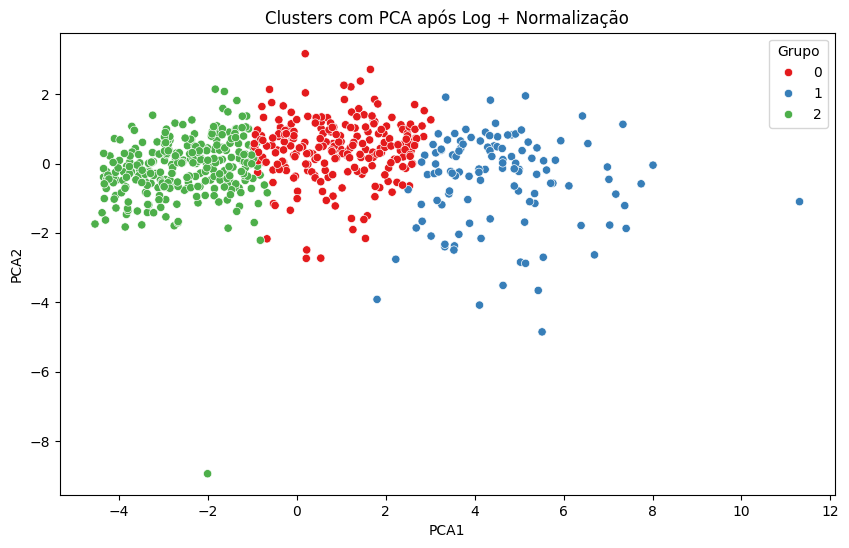

In [76]:
#refazer kmeans e pca
from sklearn.preprocessing import StandardScaler

# 1. Seleciona só as colunas _log
X = df[[col + '_log' for col in colunas_log]]

# 2. Normaliza
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# 4. Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Grupo'] = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Grupo', palette='Set1')
plt.title('Clusters com PCA após Log + Normalização')
plt.show()

In [60]:
grupo1 = df_comp_pre_knn[df_comp_pre_knn['Grupo'] == 1]
grupo1

,municipio,populacao,leitos_sus,Agropecuária,Impostos líquidos de subsídios,Indústria,PIB,PIB per capita,Serviços,Serviços (exceto administração pública),...,prof_nsus_Enfermeiro,prof_nsus_Médico,prof_sus_Enfermeiro,prof_sus_Médico,prof_tot_Enfermeiro,prof_tot_Médico,Cod_IBGE,Valor das Exportações (US$ FOB),Valor das Importações (US$ FOB),Grupo
564,SAO PAULO,11914851,14530,61896381.0,1.243491e+11,5.807778e+10,7.487590e+11,63081.76,5.662702e+11,5.203580e+11,...,9611.0,20248.0,16452.0,27871.0,26063.0,48119.0,3550308.0,4424271072,10093342569,1


In [22]:
df_comp_em = pd.merge(df_idesp_em, df_completo, left_on="NomeMunicipio", right_on="municipio")
df_comp_em = df_comp_em.drop("NomeMunicipio", axis=1)
df_comp_em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3610 entries, 0 to 3609
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   NomeEscola                               3610 non-null   object 
 1   ENSINO_MÉDIO                            3610 non-null   float64
 2   cod_ibge                                 3610 non-null   int64  
 3   municipio                                3610 non-null   object 
 4   populacao                                3610 non-null   int64  
 5   leitos_sus                               3610 non-null   int64  
 6   cod_Ibge                                 3610 non-null   int64  
 7   Agropecuária                             3610 non-null   float64
 8   Impostos líquidos de subsídios           3610 non-null   float64
 9   Indústria                                3610 non-null   float64
 10  PIB                                      3610 no

In [ ]:
df_comp_em["mergecolumn"] = df_comp_em["NomeEscola"]+"|"+df_comp_em["municipio"]
df_inse["mergecolumn"] = df_inse["NOMESC"]+"|"+df_inse["MUN"]
df_comp_em_inse = pd.merge(df_inse, df_comp_em, on="mergecolumn")
df_comp_em_inse = pd.merge(df_comp_em_inse, df_prof_em, how="left", right_on="CODESC", left_on="COD_ESC")
df_comp_em_inse = df_comp_em_inse.set_index('mergecolumn')
df_comp_em_inse = df_comp_em_inse.dropna()

In [ ]:
df_comp_em_inse[(df_comp_em_inse['municipio']=='SAO PAULO')].info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, GAVIAO PEIXOTO BRIGADEIRO|SAO PAULO to BARRO BRANCO II|SAO PAULO
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NOMESC                           582 non-null    object 
 1   NIVEL SOCIOECONOMICO DOS ALUNOS  582 non-null    float64
 2   MUN                              582 non-null    object 
 3   COD_ESC                          582 non-null    int64  
 4   NomeEscola                       582 non-null    object 
 5   ENSINO_MÉDIO                     582 non-null    float64
 6   cod_ibge                         582 non-null    int64  
 7   municipio                        582 non-null    object 
 8   populacao                        582 non-null    int64  
 9   leitos_sus                       582 non-null    int64  
 10  PIB per capita                   582 non-null    object 
 11  prof_habitante_Enfermeiro        

In [ ]:
df_comp_em_inse = df_comp_em_inse[(df_comp_em_inse['municipio']!='SAO PAULO')]
df_comp_em_inse = df_comp_em_inse.drop("NomeEscola", axis = 1)
df_comp_em_inse = df_comp_em_inse.drop("municipio", axis = 1)
df_comp_em_inse = df_comp_em_inse.drop("cod_ibge", axis = 1)
df_comp_em_inse

,NOMESC,NIVEL SOCIOECONOMICO DOS ALUNOS,MUN,COD_ESC,ENSINO_MÉDIO,populacao,leitos_sus,PIB per capita,prof_habitante_Enfermeiro,prof_habitante_Médico,prof_nsus_Enfermeiro,prof_nsus_Médico,prof_sus_Enfermeiro,prof_sus_Médico,prof_tot_Enfermeiro,prof_tot_Médico,Cod_IBGE,Valor das Exportações (US$ FOB),Valor das Importações (US$ FOB),medprof
mergecolumn,,,,,,,,,,,,,,,,,,,,
HELEN KELLER|ADAMANTINA,HELEN KELLER,5.31,ADAMANTINA,30806,1.41,33869,206,"37073,28",2.33,4.460,3,21,76,130,79,151,3500105.0,20915821,697487,729.8
DURVALINO GRION PROF|ADAMANTINA,DURVALINO GRION PROF,5.36,ADAMANTINA,31045,1.67,33869,206,"37073,28",2.33,4.460,3,21,76,130,79,151,3500105.0,20915821,697487,775.5
FLEURIDES CAVALLINI MENECHINO PROFA|ADAMANTINA,FLEURIDES CAVALLINI MENECHINO PROFA,5.54,ADAMANTINA,31112,1.19,33869,206,"37073,28",2.33,4.460,3,21,76,130,79,151,3500105.0,20915821,697487,730.8
ODILA BOVOLENTA DE MENDONCA PROFESSORA|ADOLFO,ODILA BOVOLENTA DE MENDONCA PROFESSORA,4.71,ADOLFO,27352,1.59,3436,0,"39658,07",1.46,10.800,0,0,5,37,5,37,3500204.0,0,0,704.5
JOSE THEODORO DE MORAES|AGUAI,JOSE THEODORO DE MORAES,4.89,AGUAI,20515,1.27,35885,0,"32364,73",0.58,1.990,0,23,21,49,21,72,3500303.0,137409,32478066,757.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEBASTIAO ALMEIDA OLIVEIRA|VOTUPORANGA,SEBASTIAO ALMEIDA OLIVEIRA,5.52,VOTUPORANGA,918349,2.06,92193,115,"36770,23",2.64,3.580,29,74,216,258,245,332,3557105.0,9612819,2832675,813.0
MARIA NIVEA COSTA PINTO FREITAS PROFA|VOTUPORANGA,MARIA NIVEA COSTA PINTO FREITAS PROFA,5.53,VOTUPORANGA,919697,2.59,92193,115,"36770,23",2.64,3.580,29,74,216,258,245,332,3557105.0,9612819,2832675,829.3
ANTONIO TEIXEIRA DOS SANTOS|ZACARIAS,ANTONIO TEIXEIRA DOS SANTOS,4.97,ZACARIAS,27418,2.14,2574,0,"44155,19",1.88,0.375,0,0,5,1,5,1,3557154.0,0,0,811.2


In [ ]:
df_final = df_comp_em_inse[['NIVEL SOCIOECONOMICO DOS ALUNOS','ENSINO_MÉDIO','populacao','leitos_sus','PIB per capita','prof_habitante_Enfermeiro','prof_habitante_Médico','medprof',"Valor das Exportações (US$ FOB)","Valor das Importações (US$ FOB)"]]
df_final['PIB per capita'] = df_final['PIB per capita'].str.replace(',','.').astype(float)
df_final['profsaude_habitante'] = df_final['prof_habitante_Enfermeiro'] + df_final['prof_habitante_Médico']
df_final = df_final.drop('prof_habitante_Enfermeiro', axis=1)
df_final = df_final.drop('prof_habitante_Médico', axis=1)
df_final

C:\Users\tiago\AppData\Local\Temp\ipykernel_16584\165956680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['PIB per capita'] = df_final['PIB per capita'].str.replace(',','.').astype(float)
C:\Users\tiago\AppData\Local\Temp\ipykernel_16584\165956680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['profsaude_habitante'] = df_final['prof_habitante_Enfermeiro'] + df_final['prof_habitante_Médico']


,NIVEL SOCIOECONOMICO DOS ALUNOS,ENSINO_MÉDIO,populacao,leitos_sus,PIB per capita,medprof,Valor das Exportações (US$ FOB),Valor das Importações (US$ FOB),profsaude_habitante
mergecolumn,,,,,,,,,
HELEN KELLER|ADAMANTINA,5.31,1.41,33869,206,37073.28,729.8,20915821,697487,6.790
DURVALINO GRION PROF|ADAMANTINA,5.36,1.67,33869,206,37073.28,775.5,20915821,697487,6.790
FLEURIDES CAVALLINI MENECHINO PROFA|ADAMANTINA,5.54,1.19,33869,206,37073.28,730.8,20915821,697487,6.790
ODILA BOVOLENTA DE MENDONCA PROFESSORA|ADOLFO,4.71,1.59,3436,0,39658.07,704.5,0,0,12.260
JOSE THEODORO DE MORAES|AGUAI,4.89,1.27,35885,0,32364.73,757.4,137409,32478066,2.570
...,...,...,...,...,...,...,...,...,...
SEBASTIAO ALMEIDA OLIVEIRA|VOTUPORANGA,5.52,2.06,92193,115,36770.23,813.0,9612819,2832675,6.220
MARIA NIVEA COSTA PINTO FREITAS PROFA|VOTUPORANGA,5.53,2.59,92193,115,36770.23,829.3,9612819,2832675,6.220
ANTONIO TEIXEIRA DOS SANTOS|ZACARIAS,4.97,2.14,2574,0,44155.19,811.2,0,0,2.255


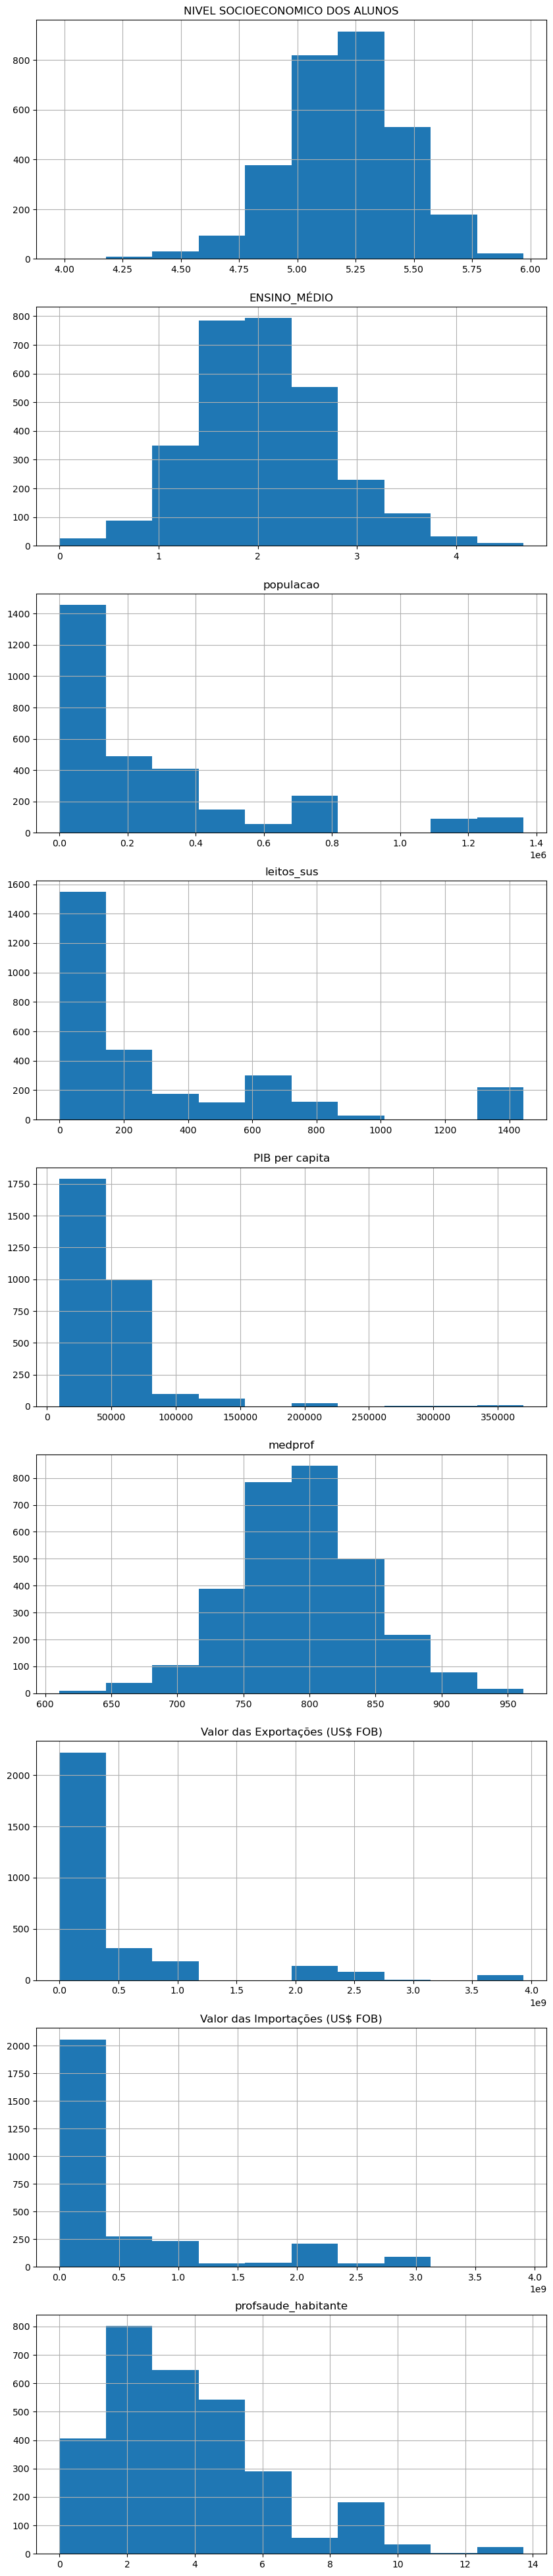

In [ ]:
i = 1
plt.figure(figsize=(10, 50))
for name in df_final.columns:
    ax = plt.subplot((len(df_final.columns)*100)+10+i)
    ax.title.set_text((name))
    plt.hist(df_final[name])
    i+=1
    plt.grid()
plt.show()

In [ ]:
df_final.describe()

,NIVEL SOCIOECONOMICO DOS ALUNOS,ENSINO_MÉDIO,populacao,leitos_sus,PIB per capita,medprof,Valor das Exportações (US$ FOB),Valor das Importações (US$ FOB),profsaude_habitante
count,2980.000000,2980.000000,2.980000e+03,2980.000000,2980.000000,2980.000000,2.980000e+03,2.980000e+03,2980.000000
mean,5.204648,2.052990,2.758592e+05,301.129530,46182.214698,794.271946,4.010036e+08,4.901327e+08,3.733062
std,0.252326,0.684934,3.354106e+05,389.895702,32799.276053,49.547802,7.717461e+08,8.045442e+08,2.369833
min,3.980000,0.000000,8.110000e+02,0.000000,9875.700000,610.800000,0.000000e+00,0.000000e+00,0.000000
25%,5.040000,1.600000,3.914650e+04,36.000000,28944.405000,762.500000,7.715453e+06,1.719048e+06,1.817500
50%,5.210000,2.000000,1.486130e+05,115.000000,41136.270000,792.800000,6.626382e+07,6.113253e+07,3.205000
75%,5.370000,2.452500,3.749970e+05,488.000000,54481.952500,824.400000,4.343216e+08,5.729570e+08,5.090000
max,5.970000,4.680000,1.361862e+06,1444.000000,369866.410000,961.900000,3.933048e+09,3.904772e+09,13.720000


In [ ]:
minMaxScaler = preprocessing.MinMaxScaler((0,1))
df_scaled = pd.DataFrame(minMaxScaler.fit_transform(df_final), columns=df_final.columns, index=df_final.index)
df_scaled

,NIVEL SOCIOECONOMICO DOS ALUNOS,ENSINO_MÉDIO,populacao,leitos_sus,PIB per capita,medprof,Valor das Exportações (US$ FOB),Valor das Importações (US$ FOB),profsaude_habitante
mergecolumn,,,,,,,,,
HELEN KELLER|ADAMANTINA,0.668342,0.301282,0.024289,0.142659,0.075551,0.338935,0.005318,0.000179,0.494898
DURVALINO GRION PROF|ADAMANTINA,0.693467,0.356838,0.024289,0.142659,0.075551,0.469097,0.005318,0.000179,0.494898
FLEURIDES CAVALLINI MENECHINO PROFA|ADAMANTINA,0.783920,0.254274,0.024289,0.142659,0.075551,0.341783,0.005318,0.000179,0.494898
ODILA BOVOLENTA DE MENDONCA PROFESSORA|ADOLFO,0.366834,0.339744,0.001929,0.000000,0.082731,0.266876,0.000000,0.000000,0.893586
JOSE THEODORO DE MORAES|AGUAI,0.457286,0.271368,0.025770,0.000000,0.062471,0.417545,0.000035,0.008318,0.187318
...,...,...,...,...,...,...,...,...,...
SEBASTIAO ALMEIDA OLIVEIRA|VOTUPORANGA,0.773869,0.440171,0.067141,0.079640,0.074709,0.575904,0.002444,0.000725,0.453353
MARIA NIVEA COSTA PINTO FREITAS PROFA|VOTUPORANGA,0.778894,0.553419,0.067141,0.079640,0.074709,0.622330,0.002444,0.000725,0.453353
ANTONIO TEIXEIRA DOS SANTOS|ZACARIAS,0.497487,0.457265,0.001295,0.000000,0.095223,0.570778,0.000000,0.000000,0.164359


In [ ]:
inertia_infra = []
inertia_edu = []
maxMeans = 10
labels_infra = []
labels_edu = []
df_infra = df_scaled[['NIVEL SOCIOECONOMICO DOS ALUNOS','populacao','leitos_sus','PIB per capita','profsaude_habitante',
                      "Valor das Exportações (US$ FOB)","Valor das Importações (US$ FOB)"]]
df_edu = df_scaled[['ENSINO_MÉDIO','medprof']]
for i in range(2, maxMeans+1):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df_infra)
    inertia_infra.append(kmeans.inertia_)
    label=kmeans.predict(df_infra)
    labels_infra.append(label)
for i in range(2, maxMeans+1):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df_edu)
    inertia_edu.append(kmeans.inertia_)
    label=kmeans.predict(df_edu)
    labels_edu.append(label)

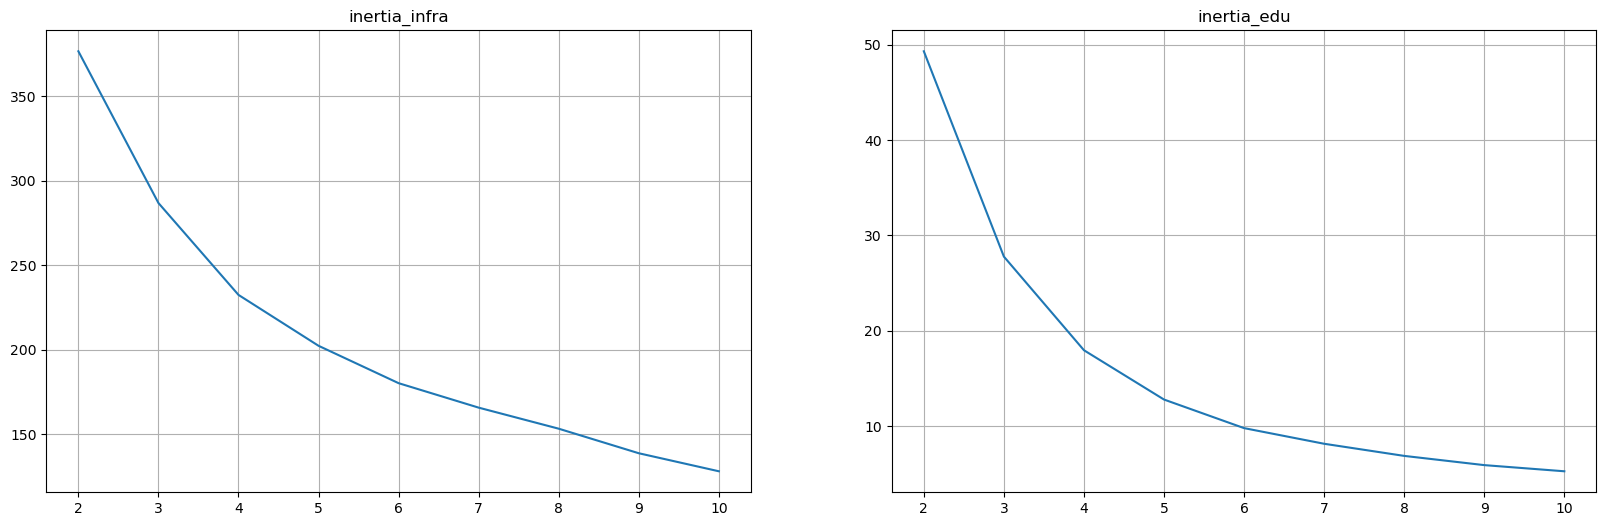

In [ ]:
x_axis = range(2, maxMeans+1)
plt.figure(figsize=(20, 6))
ax = plt.subplot(121)
ax.title.set_text('inertia_infra')
plt.plot(x_axis, inertia_infra)
plt.grid()
ax = plt.subplot(122)
ax.title.set_text('inertia_edu')
plt.plot(x_axis, inertia_edu)
plt.grid()
plt.show()

In [ ]:
nclusters=3
df_mapped = df_final
df_mapped['infra'] = labels_infra[nclusters-2]
df_mapped['edu'] = labels_edu[nclusters-2]
df_report_edu = df_mapped[['ENSINO_MÉDIO', 'medprof', 'edu']].groupby('edu').mean()
df_report_edu

,ENSINO_MÉDIO,medprof
edu,,
0,2.112364,800.468460
1,3.055973,864.269113
2,1.324147,740.152268


In [ ]:
df_report_infra = df_mapped[['NIVEL SOCIOECONOMICO DOS ALUNOS', 'populacao','leitos_sus','PIB per capita',
                             'profsaude_habitante','infra',"Valor das Exportações (US$ FOB)",
                             "Valor das Importações (US$ FOB)"]].groupby('infra').mean()
df_report_infra

,NIVEL SOCIOECONOMICO DOS ALUNOS,populacao,leitos_sus,PIB per capita,profsaude_habitante,Valor das Exportações (US$ FOB),Valor das Importações (US$ FOB)
infra,,,,,,,
0,5.160610,1.097263e+05,81.031504,38985.862271,2.580922,9.505170e+07,1.384417e+08
1,5.284017,1.026535e+06,1089.145299,54360.209744,5.469744,2.021133e+09,2.254006e+09
2,5.293616,3.718687e+05,537.981846,63265.339228,6.241135,4.516057e+08,6.005842e+08


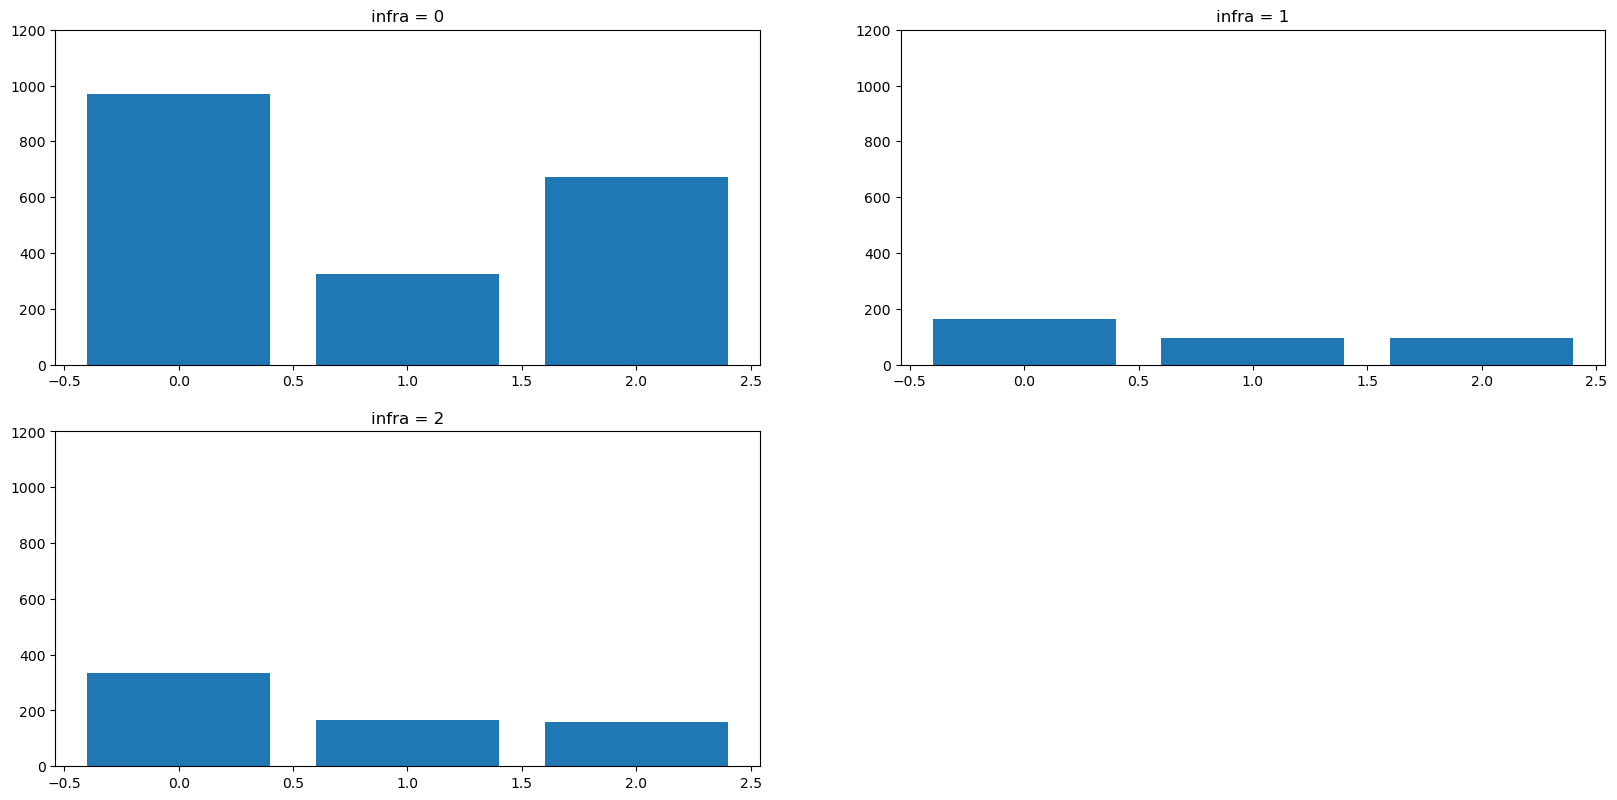

In [ ]:
names = range(0,nclusters)
ylim = 1200

i = 1
plt.figure(figsize=(20, 20))
for i in range(0,nclusters):
    ax = plt.subplot(420+i+1)
    ax.title.set_text(f'infra = {i}')
    plt.bar(names, df_mapped[(df_mapped['infra'] == i)].groupby('edu').count()['infra'])
    plt.ylim(0, ylim)
    i+=1
plt.show()

In [ ]:
prop = []
for i in range(0,nclusters):
    edu = df_mapped[(df_mapped['infra'] == i)].groupby('edu').count()['infra']
    prop.append(edu[2]/edu[1])
prop

[2.0707692307692307, 1.0106382978723405, 0.9461077844311377]

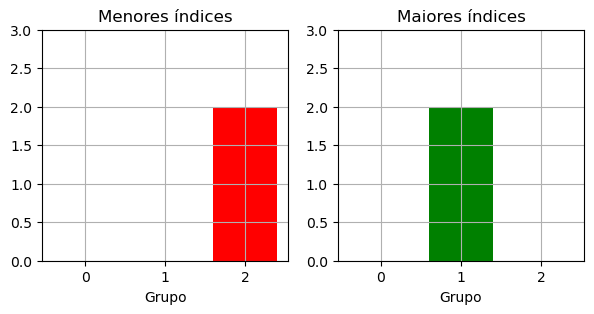

In [ ]:
min_edu=np.zeros(nclusters)
max_edu=np.zeros(nclusters)
for column in df_report_edu.columns:
    min_index = df_report_edu[column].idxmin()
    max_index = df_report_edu[column].idxmax()
    min_edu[min_index] += 1
    max_edu[max_index] += 1
names = []
for i in range(0,nclusters):
    names.append(str(i))
plt.figure(figsize=(7, 3))
ax = plt.subplot(121)
ax.title.set_text('Menores índices')
ax.set_xlabel('Grupo')
plt.bar(names, min_edu, color='red')
plt.ylim(0, 3)
plt.grid()
ax = plt.subplot(122)
ax.title.set_text('Maiores índices')
ax.set_xlabel('Grupo')
plt.bar(names, max_edu, color='green')
plt.ylim(0, 3)
plt.grid()
plt.show()

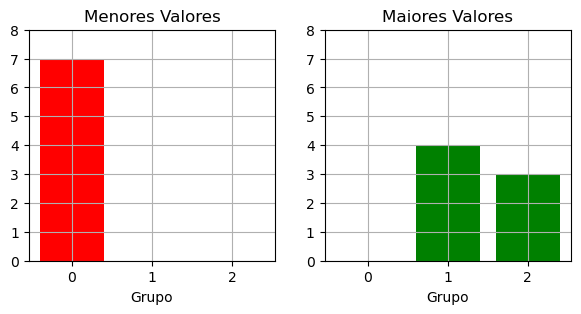

In [ ]:
min_infra=np.zeros(nclusters)
max_infra=np.zeros(nclusters)
for column in df_report_infra.columns:
    min_index = df_report_infra[column].idxmin()
    max_index = df_report_infra[column].idxmax()
    min_infra[min_index] += 1
    max_infra[max_index] += 1
plt.figure(figsize=(7, 3))
ax = plt.subplot(121)
ax.title.set_text('Menores Valores')
plt.bar(names, min_infra, color='red')
ax.set_xlabel('Grupo')
plt.ylim(0, 8)
plt.grid()
ax = plt.subplot(122)
ax.title.set_text('Maiores Valores')
plt.bar(names, max_infra, color='green')
ax.set_xlabel('Grupo')
plt.ylim(0, 8)
plt.grid()
plt.show()

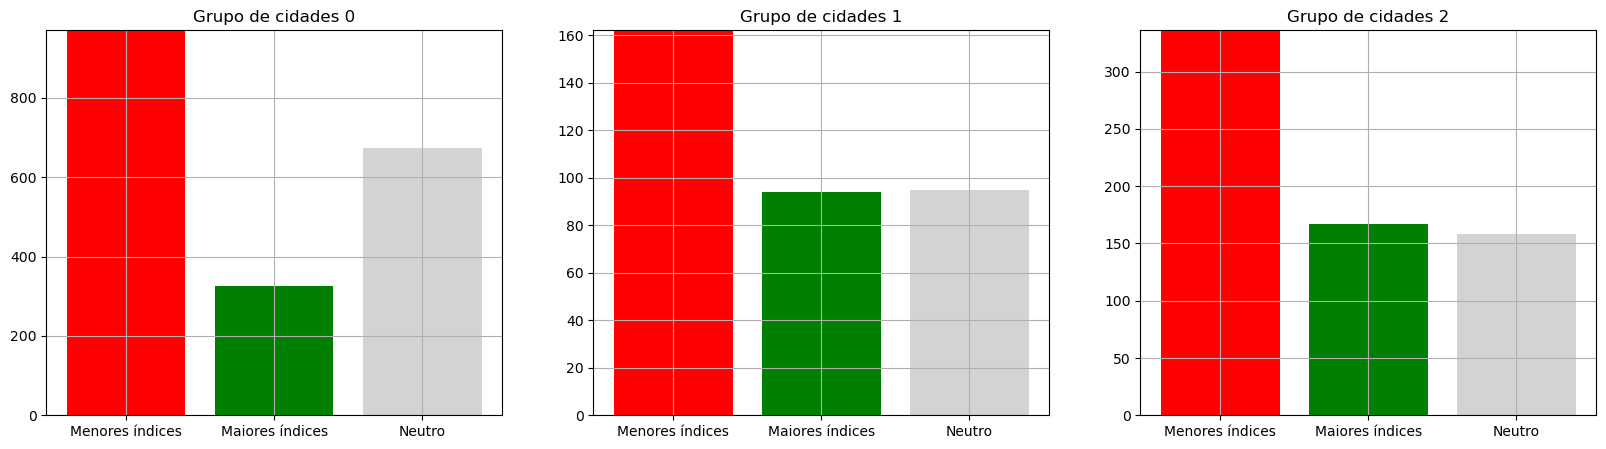

In [ ]:
i = 1
plt.figure(figsize=(20, 5))
rotulos_x = ("Menores índices", "Maiores índices", "Neutro")
for i in range(0,nclusters):
    df_plot = df_mapped[(df_mapped['infra'] == i)].groupby('edu').count()['infra']
    ax = plt.subplot(130+i+1)
    ax.title.set_text(f'Grupo de cidades {i}')
    plt.bar(rotulos_x, df_plot, color=['red','green','lightgray'])
    plt.ylim(0, max(df_plot))
    plt.grid()
    i+=1
plt.show()

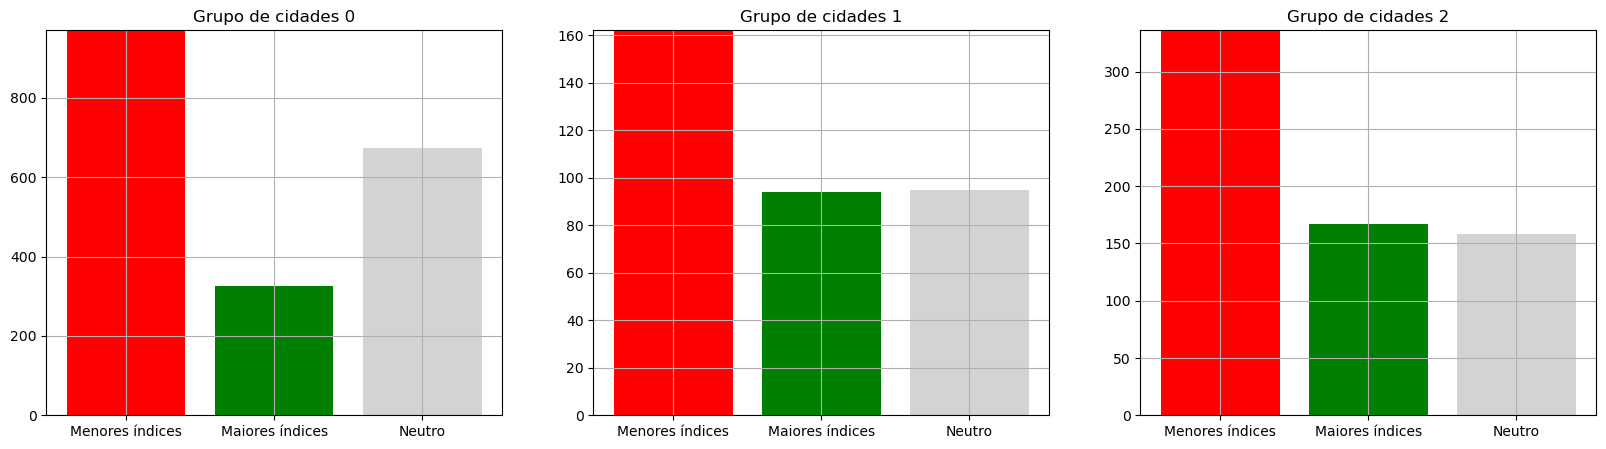

In [ ]:
i = 1
plt.figure(figsize=(20, 5))
rotulos_x = ("Menores índices", "Maiores índices", "Neutro")
for i in range(0,nclusters):
    df_plot = df_mapped[(df_mapped['infra'] == i)].groupby('edu').count()['infra']
    ax = plt.subplot(130+i+1)
    ax.title.set_text(f'Grupo de cidades {i}')
    plt.bar(rotulos_x, df_plot, color=['red','green','lightgray'])
    plt.ylim(0, max(df_plot))
    plt.grid()
    i+=1
plt.show()